# Задача интерполяции. Интерполяционный многочлен Лагранжа.

### Общая формулировка задачи интерполяции

Пусть имеются значения ф-ии $f$ в $N$ различных точках $x_i$ ($i \in (0, 1, ..., N)$): $y_i = f(x_i)$

Задачей интерполяции является задача поиска такой функции $P(x)$, что $P(x_i) = y_i$ для $i \in (0, 1, ..., N)$

- точки $x_i$ называются узлами интерполяции, $\{ x_i \}$ - интерполяционная сетка
- $P(x)$ - интерполирующая функция

### Интерполяционный многочлен Лангранжа

Интерополяционный многочлен Лагранжа является примером решения интерполяционной задачи, когда для роли интерполяционной функции производится поиск многочлена минимальной степени. Для N пар $(x_i, y_i)$ это будет многочлен степени N - 1, который представляет собой линейную комбинацию некоторых многочленов $\varphi_j(t)$:

$$P(t) = \sum_{j = 1}^{N} y_i * \varphi_j(t)$$

Многочлены $\varphi_j(t)$ должны обладать выжным свойством:

$$\varphi_j(t) = \begin{cases} 1, & t = j \\ 0, & t \ne j \end{cases}$$

Очевидно, что в этом случае функкция $P(t)$ будет интерполяционной функцией. Такие многочлены могут быть выражены следующим образом:

$$\varphi_k(t) = \prod_{j = 1; j \ne k}^{N} (\frac{t - t_j}{t_k - t_j})$$

### Пример построения интерполяционного многочлена Лагранжа на Python

Реализуем функцию, которая создает функцию расчета интерполяционного многочлена Лагранжа.

In [1]:
import numpy as np

def create_langrange(X, Y):
    def lagrange(x):
        value = 0
        for i, (xi, yi) in enumerate(zip(X, Y)):
            prod = 1
            for j, (xj, yj) in enumerate(zip(X, Y)):
                if i != j:
                    prod *= (x - xj) / (xi - xj)
            value += prod * yi
        return value
    return np.vectorize(lagrange)        

В качестве примера найдем интерполяционный многочлен для ф-ии $f(x) = sin(x) - 0.2 * cos(x)$.
Пусть заданы точки на сетке $\{1, 2, 3, 4, 5\}$:

In [2]:
from math import sin
from math import cos

f = np.vectorize(lambda x: sin(x) - 0.2 * cos(x))

X = [x for x in range(1, 6)]
Y = f(X)

Создадим функцию для рассчета многочлена лагранжа и посчитаем его значения на 100 точках внутри интервала [0, 6].

In [3]:
P = create_langrange(X, Y)

t = np.linspace(0, 6, 100)
L = P(t)
y = f(t)

Нарисуем полученные значения на графике.

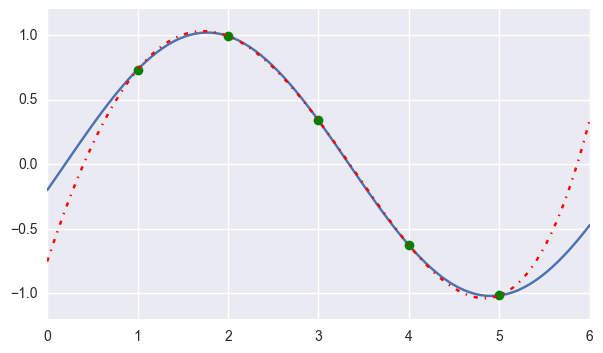

In [4]:
%matplotlib inline

import seaborn
seaborn.mpl.rcParams['figure.figsize'] = (7.0, 4.0)
seaborn.mpl.rcParams['savefig.dpi'] = 100

import matplotlib
import matplotlib.pyplot as plt

plt.axis([0, 6, -1.2, 1.2])
py = plt.plot(t, y)
pY = plt.plot(X, Y, 'og')
pL = plt.plot(t, L, '-.r')


### Домашняя работа

Функция принимает значения $y_j = (-1)^j$ в точках $x = j$ при $j = 1,...,4$ и при $ j = 1,...,5$.
В первом случае нужно построить интерполяционный кубический многочлен, а во втором – 4-й степени. Определите их значения при $x=1.5$ и $x=2.5$. 
Постройте графики интерполяционных многочленов: первый синим, а второй красным цветом на отрезке $[0,6]$.

Создадим ф-ию для вычисления истинных значений.

In [5]:
func = np.vectorize(lambda x: np.power(-1, x))

Определим две сетки интерполяции согласно условию задачи.

In [6]:
x1 = [x for x in range(1, 5)]
x2 = [x for x in range(1, 6)]

Создадим функции для расчета значений соответствующих этим сеткам интерполяционных многочленов и определим их значения в интересующих точках $x=1.5$ и $x=2.5$.

In [7]:
P1 = create_langrange(x1, func(x1))
P2 = create_langrange(x2, func(x2))

xs = [1.5, 2.5]
print("Значения в точках %s полинома P1 = %s" % (xs, P1(xs)))
print("Значения в точках %s полинома P2 = %s" % (xs, P2(xs)))

Значения в точках [1.5, 2.5] полинома P1 = [ 1.  0.]
Значения в точках [1.5, 2.5] полинома P2 = [ 1.625 -0.375]


Построим графики полученных полиномов.

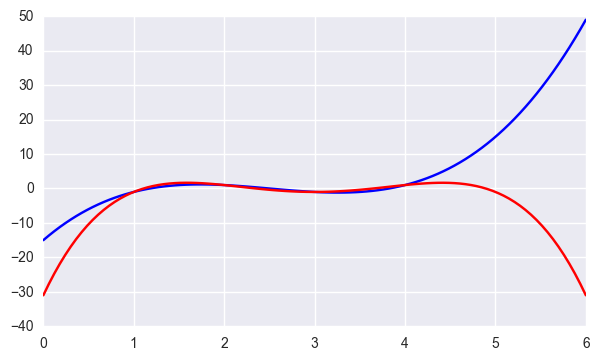

In [8]:
t = np.linspace(0, 6, 100)
L1 = P1(t)
L2 = P2(t)

plt.plot(t, L1, 'b')
plt.plot(t, L2, 'r')